In [6]:
import spectral.io.envi as envi
#import spectral
from spectral import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import wx
from wx import glcanvas
import numpy as np 
import warnings
import pandas as pd
#from IPython.html.widgets import *
from ipywidgets import *
#from IPython.html.widgets import interact # IPython < 4.x
from sys import platform  #Detect platform!



class UnsupportedPlatform(Exception):
    pass

In [26]:
ListRef = []
if "linux" in platform:
    print("linux GREAT :)")
    print("TODO")
elif "darwin" in platform:
    print("mac")
    print("No support!!!!!!")
elif "win" in platform:
    print("windows TAAAA :(")
    #Set path work!
    ref_1_PATH = r'C:\Users\Desarrollo\Ubuntu_Folder\ToolsBlackREF_HIS\CARLOSIMAGENES_NEGRAS\carlos_3-8_15000_17000__15000_us_2x_2020-01-27T202248_corr'
    #print(ref_1_PATH+'.hdr')
    ListRef.append(envi.open( ref_1_PATH+'.hdr',ref_1_PATH+'.hyspex'))
    ref_2_PATH = r'C:\Users\Desarrollo\Ubuntu_Folder\ToolsBlackREF_HIS\CARLOSIMAGENES_NEGRAS\carlos_3-8_16000_17000__16000_us_2x_2020-01-27T202006_corr'
    ListRef.append(envi.open( ref_2_PATH+'.hdr',ref_2_PATH+'.hyspex'))
    ref_3_PATH = r'C:\Users\Desarrollo\Ubuntu_Folder\ToolsBlackREF_HIS\CARLOSIMAGENES_NEGRAS\carlos_3-8_16000_17000_v2_16000_us_2x_2020-01-27T202131_corr'
    ListRef.append(envi.open( ref_3_PATH+'.hdr',ref_3_PATH+'.hyspex'))
    print('Tamaño lista: ' + str(len(ListRef)))
    
    example_lan = r'C:\Users\Desarrollo\Ubuntu_Folder\ToolsBlackREF_HIS\Example\92AV3C.lan' 
    example_spc = r'C:\Users\Desarrollo\Ubuntu_Folder\ToolsBlackREF_HIS\Example\92AV3C.spc'
    example_GIS = r'C:\Users\Desarrollo\Ubuntu_Folder\ToolsBlackREF_HIS\Example\92AV3GT.GIS'
    img = open_image(example_lan).load()
    gt = open_image(example_GIS).read_band(0)
    print('Cargar los ejemplos!')
else:
    raise UnsupportedPlatform

windows TAAAA :(
Tamaño lista: 3
Cargar los ejemplos!


In [8]:
#Ver las listas cargadas.
for i in range(len(ListRef)):
    print('############################################################################################################################################################################')
    print('Lista Número ' + str(i) + ': ')
    print(ListRef[i])
print('############################################################################################################################################################################')

############################################################################################################################################################################
Lista Número 0: 
	Data Source:   'C:\Users\Desarrollo\Ubuntu_Folder\ToolsBlackREF_HIS\CARLOSIMAGENES_NEGRAS\carlos_3-8_15000_17000__15000_us_2x_2020-01-27T202248_corr.hyspex'
	# Rows:           1000
	# Samples:        1600
	# Bands:           160
	Interleave:        BIL
	Quantization:  16 bits
	Data format:    uint16
############################################################################################################################################################################
Lista Número 1: 
	Data Source:   'C:\Users\Desarrollo\Ubuntu_Folder\ToolsBlackREF_HIS\CARLOSIMAGENES_NEGRAS\carlos_3-8_16000_17000__16000_us_2x_2020-01-27T202006_corr.hyspex'
	# Rows:           1000
	# Samples:        1600
	# Bands:           160
	Interleave:        BIL
	Quantization:  16 bits
	Data format:    uint16
################

ImageView object:
  Display bands       :  [55, 41, 12]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 118.0]
    G: [0.0, 142.0]
    B: [0.0, 128.0]

(1000, 1600, 160)


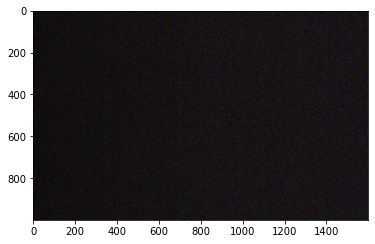

In [13]:
view = imshow(ListRef[0])
print(view)
print(ListRef[0].shape)

In [22]:
#ejemplo: http://www.spectralpython.net/algorithms.html
(m, c) = kmeans(img, 20, 30)

spectral:INFO: k-means iteration 1 - 21024 pixels reassigned.
spectral:INFO: k-means iteration 2 - 11214 pixels reassigned.
spectral:INFO: k-means iteration 3 - 4726 pixels reassigned.
spectral:INFO: k-means iteration 4 - 1767 pixels reassigned.
spectral:INFO: k-means iteration 5 - 1240 pixels reassigned.
spectral:INFO: k-means iteration 6 - 1420 pixels reassigned.
spectral:INFO: k-means iteration 7 - 1442 pixels reassigned.
spectral:INFO: k-means iteration 8 - 1205 pixels reassigned.
spectral:INFO: k-means iteration 9 - 1041 pixels reassigned.
spectral:INFO: k-means iteration 10 - 934 pixels reassigned.
spectral:INFO: k-means iteration 11 - 977 pixels reassigned.
spectral:INFO: k-means iteration 12 - 1027 pixels reassigned.
spectral:INFO: k-means iteration 13 - 1019 pixels reassigned.
spectral:INFO: k-means iteration 14 - 1011 pixels reassigned.
spectral:INFO: k-means iteration 15 - 904 pixels reassigned.
spectral:INFO: k-means iteration 16 - 702 pixels reassigned.
spectral:INFO: k-me

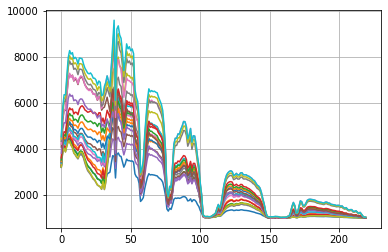

In [25]:
plt.figure()
for i in range(c.shape[0]):
    plt.plot(c[i])
plt.grid()

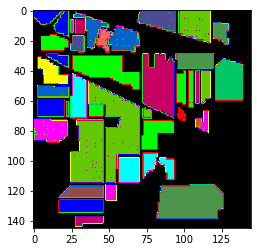

In [32]:
v = imshow(classes=gt)

In [31]:
classes = create_training_classes(img, gt)

In [33]:
gmlc = GaussianClassifier(classes)

spectral:INFO: Setting min samples to 220
spectral:WARNING: Omitting class   1 : only 54 samples present
spectral:WARNING: Omitting class   7 : only 26 samples present
spectral:WARNING: Omitting class   9 : only 20 samples present
spectral:WARNING: Omitting class  13 : only 212 samples present
spectral:WARNING: Omitting class  16 : only 95 samples present


In [34]:
clmap = gmlc.classify_image(img)

Processing...  0.0Processing...  9.1Processing... 18.2Processing... 27.3Processing... 36.4Processing... 45.5Processing... 54.5Processing... 63.6Processing... 72.7Processing... 81.8Processing... 90.9Processing... 100.Processing...done   


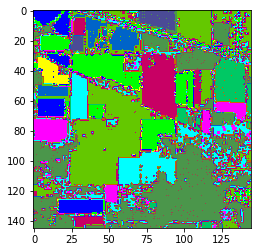

In [35]:
v = imshow(classes=clmap)

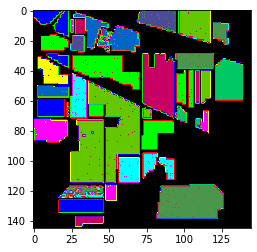

In [36]:
gtresults = clmap * (gt != 0)
v = imshow(classes=gtresults)

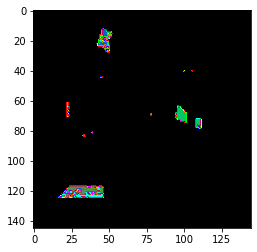

In [37]:
gterrors = gtresults * (gtresults != gt)
v = imshow(classes=gterrors)